In [84]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [85]:
#Read the data
data= pd.read_csv("telecom_churn_data.csv")
print(data.head())

   mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...     

In [86]:
#Displaying column names
for i in data.columns:
    print(i)

mobile_number
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
arpu_6
arpu_7
arpu_8
arpu_9
onnet_mou_6
onnet_mou_7
onnet_mou_8
onnet_mou_9
offnet_mou_6
offnet_mou_7
offnet_mou_8
offnet_mou_9
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_ic_mou_9
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
roam_og_mou_9
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2t_mou_9
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2m_mou_9
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2f_mou_9
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_t2c_mou_9
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
loc_og_mou_9
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2t_mou_9
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2m_mou_9
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2f_mou_9
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_og_mou_

In [87]:
# col = data.columns
# for i in col:
#     print(i + " : ",data[i].unique()) 
#     print(i + " : ",len(data[i].unique())) 
#     print("\n")

# Checking null values

In [88]:
data.isnull().sum()

mobile_number               0
circle_id                   0
loc_og_t2o_mou           1018
std_og_t2o_mou           1018
loc_ic_t2o_mou           1018
last_date_of_month_6        0
last_date_of_month_7      601
last_date_of_month_8     1100
last_date_of_month_9     1659
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
onnet_mou_6              3937
onnet_mou_7              3859
onnet_mou_8              5378
onnet_mou_9              7745
offnet_mou_6             3937
offnet_mou_7             3859
offnet_mou_8             5378
offnet_mou_9             7745
roam_ic_mou_6            3937
roam_ic_mou_7            3859
roam_ic_mou_8            5378
roam_ic_mou_9            7745
roam_og_mou_6            3937
roam_og_mou_7            3859
roam_og_mou_8            5378
roam_og_mou_9            7745
loc_og_t2t_mou_6         3937
                        ...  
arpu_2g_9               74077
night_pck_user_6        74846
night_pck_

# Insights

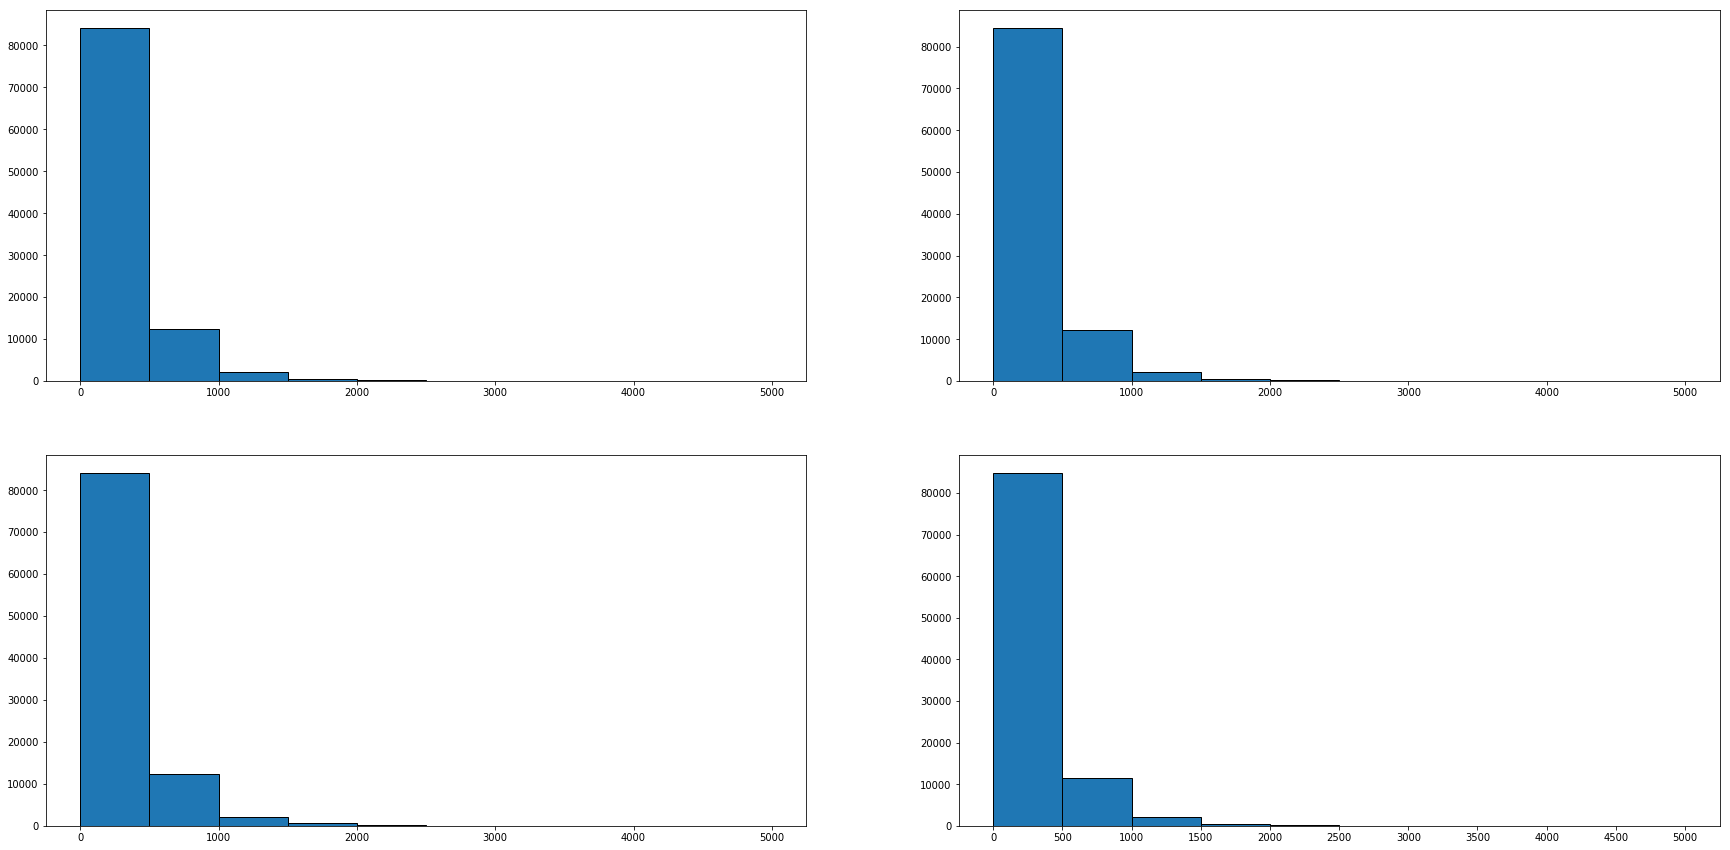

In [89]:
bins= [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000]
fig, ax = plt.subplots(2,2,figsize=(30,15))

ax[0,0].hist(data["arpu_6"], bins=bins, edgecolor="k")
ax[0,1].hist(data["arpu_7"], bins=bins, edgecolor="k")
ax[1,0].hist(data["arpu_8"], bins=bins, edgecolor="k")
ax[1,1].hist(data["arpu_9"], bins=bins, edgecolor="k")

plt.xticks(bins)

plt.show()

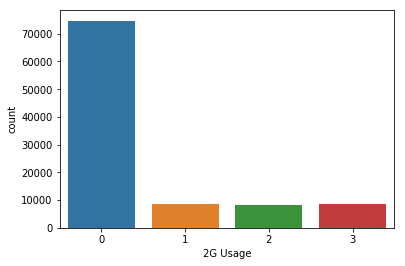

In [90]:
combined_list = []
combined_list.append(data.iloc[:]["vol_2g_mb_6"])
combined_list.append(data.iloc[:]["vol_2g_mb_7"])
combined_list.append(data.iloc[:]["vol_2g_mb_8"])
combined_list.append(data.iloc[:]["vol_2g_mb_9"])
ltt = []
for i in range(len(combined_list[0])):
    values = [combined_list[0][i], combined_list[1][i], combined_list[2][i], combined_list[3][i]]
    ltt.append(values.index(sorted(values)[3]))
    
data["2G Usage"]=pd.DataFrame(ltt)

sns.countplot(x='2G Usage',data=data)
plt.show()

In [91]:
data.drop('2G Usage',axis=1,inplace=True)

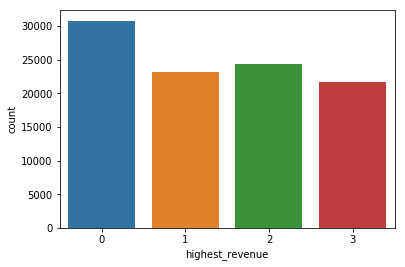

In [92]:
combined_list = []
combined_list.append(data.iloc[:]["arpu_6"])
combined_list.append(data.iloc[:]["arpu_7"])
combined_list.append(data.iloc[:]["arpu_8"])
combined_list.append(data.iloc[:]["arpu_9"])
ltt = []
for i in range(len(combined_list[0])):
    values = [combined_list[0][i], combined_list[1][i], combined_list[2][i], combined_list[3][i]]
    ltt.append(values.index(sorted(values)[3]))
    
data["highest_revenue"]=pd.DataFrame(ltt)

sns.countplot(x='highest_revenue',data=data)
plt.show()

In [93]:
data.drop('highest_revenue',axis=1,inplace=True)

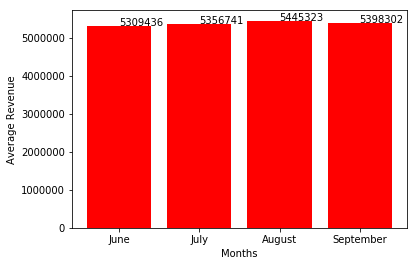

In [94]:
dtd = data.dropna()

arpu = np.array([sum(list(dtd["arpu_6"])), sum(list(dtd["arpu_7"])), sum(list(dtd["arpu_8"])), sum(list(dtd["arpu_9"]))])
X = ['June','July','August','September'] 

for x,y in zip(X,arpu):
    plt.text(x,y,int(y))

plt.bar(X, arpu, color = 'r')
plt.xlabel('Months')
plt.ylabel('Average Revenue')
plt.show()

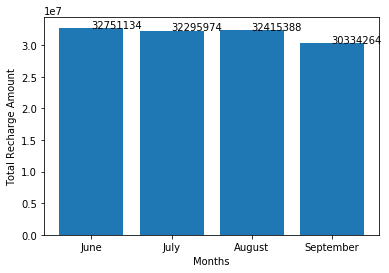

In [99]:
X = ['June','July','August','September'] 
tot = np.array([sum(list(data["total_rech_amt_6"])),sum(list(data["total_rech_amt_7"])),sum(list(data["total_rech_amt_8"])),
               sum(list(data["total_rech_amt_9"]))])


for x,y in zip(X,tot):
    plt.text(x,y,int(y))

plt.bar(X,tot)

plt.xlabel('Months')
plt.ylabel('Total Recharge Amount')
plt.show()

# New Column

In [13]:
data['total_rech_data_amt_6'] = data['total_rech_data_6'] * data['av_rech_amt_data_6']
data['total_rech_data_amt_7'] = data['total_rech_data_7'] * data['av_rech_amt_data_7']
data['total_rech_data_amt_8'] = data['total_rech_data_8'] * data['av_rech_amt_data_8']
data['total_rech_data_amt_9'] = data['total_rech_data_9'] * data['av_rech_amt_data_9']

In [14]:
drop_col = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
data.drop(drop_col, axis=1, inplace=True)

In [15]:
data.shape

(99999, 222)

# Drop columns with one unique value

In [16]:
col = data.columns
rmvCol = []
for i in col:
    val = data[i].unique()
    cont = len(data[i].unique())
    if cont == 1:
        rmvCol.append(i)
    elif cont == 2 and "nan" in [str(j) for j in val]:
        rmvCol.append(i)
    elif data.shape[0] == cont:
        rmvCol.append(i)
print(rmvCol)

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [17]:
data = data.drop(rmvCol, axis = 1) 
data.shape

(99999, 205)

# Drop columns with more than 30% missing values

In [18]:
data = data.loc[:, data.isnull().mean() < .3]
data.shape

(99999, 169)

# Drop rows with all null values

In [19]:
data = data.dropna(how ='all',axis=0) 
data.shape

(99999, 169)

# Create CHURN column

In [20]:
data['churn'] = -1

In [21]:
data.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,...,0,0,0,0,968,30.4,0.0,101.20,3.58,-1
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,...,0,0,0,0,1006,0.0,0.0,0.00,0.00,-1
2,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,...,0,0,0,0,1103,0.0,0.0,4.17,0.00,-1
3,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,...,0,0,0,0,2491,0.0,0.0,0.00,0.00,-1
4,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,...,0,0,0,0,1526,0.0,0.0,0.00,0.00,-1


In [22]:
data3 = data[(data['total_ic_mou_6'] == 0) & (data['total_og_mou_6'] == 0) & 
         (data['vol_2g_mb_6'] == 0) & (data['vol_3g_mb_6'] == 0) & (data['total_ic_mou_7'] == 0) &
         (data['total_og_mou_7'] == 0) & (data['vol_2g_mb_7'] == 0) & (data['vol_3g_mb_7'] == 0) & 
         (data['total_ic_mou_8'] == 0) & 
         (data['total_og_mou_8'] == 0) & (data['vol_2g_mb_8'] == 0) & (data['vol_3g_mb_8'] == 0) & 
        (data['total_ic_mou_9'] == 0) & (data['total_og_mou_9'] == 0) & (data['vol_2g_mb_9'] == 0) & 
         (data['vol_3g_mb_9'] == 0)]

data4 = data[(data['total_ic_mou_6'] != 0) & (data['total_og_mou_6'] != 0) & 
         (data['vol_2g_mb_6'] != 0) & (data['vol_3g_mb_6'] != 0) & (data['total_ic_mou_7'] != 0) &
         (data['total_og_mou_7'] != 0) & (data['vol_2g_mb_7'] != 0) & (data['vol_3g_mb_7'] != 0) & 
         (data['total_ic_mou_8'] != 0) & 
         (data['total_og_mou_8'] != 0) & (data['vol_2g_mb_8'] != 0) & (data['vol_3g_mb_8'] != 0) & 
        (data['total_ic_mou_9'] != 0) & (data['total_og_mou_9'] != 0) & (data['vol_2g_mb_9'] != 0) & 
         (data['vol_3g_mb_9'] != 0)]

data5 = data[(data['total_ic_mou_6'] != 0) & (data['total_og_mou_6'] != 0) & 
         (data['vol_2g_mb_6'] != 0) & (data['vol_3g_mb_6'] == 0) & (data['total_ic_mou_7'] != 0) &
         (data['total_og_mou_7'] != 0) & (data['vol_2g_mb_7'] != 0) & (data['vol_3g_mb_7'] != 0) & 
         (data['total_ic_mou_8'] == 0) & 
         (data['total_og_mou_8'] == 0) & (data['vol_2g_mb_8'] == 0) & (data['vol_3g_mb_8'] == 0) & 
        (data['total_ic_mou_9'] == 0) & (data['total_og_mou_9'] == 0) & (data['vol_2g_mb_9'] == 0) & 
         (data['vol_3g_mb_9'] == 0)]

# data6 = data[((data["total_rech_num_9"] == 0) & (data["total_rech_num_8"] == 0) & (data["total_rech_num_7"] == 0) & 
#               (data["total_rech_num_6"] == 0)) | ((data["total_rech_num_9"] == 0) & (data["total_rech_num_8"] == 0) & 
#               (data["total_rech_num_7"] == 0) ) | ((data["total_rech_num_9"] == 0) & (data["total_rech_num_8"] == 0))]

data7 = data[((data["total_rech_num_6"] == 0) & (data["total_rech_num_7"] > 50) & (data["total_rech_num_8"] > 50) & 
              (data["total_rech_num_9"] > 50)) | ((data["total_rech_num_6"] > 50) & (data["total_rech_num_7"] == 0) & 
               (data["total_rech_num_8"] > 50) & (data["total_rech_num_9"] > 50)) | ((data["total_rech_num_6"] > 50) & 
              (data["total_rech_num_7"] > 50) & (data["total_rech_num_8"] == 0) & (data["total_rech_num_9"] > 50))]

In [23]:
indexes = list(data3.index)
data.iloc[indexes,169] = 1
data['churn'].unique()

array([-1,  1], dtype=int64)

In [24]:
indexes = list(data4.index)
data.iloc[indexes,169] = 0
data['churn'].unique()

array([-1,  0,  1], dtype=int64)

In [25]:
indexes = list(data5.index)
data.iloc[indexes,169] = 1
data['churn'].unique()

array([-1,  0,  1], dtype=int64)

In [26]:
# indexes = list(data6.index)
# data.iloc[indexes,169] = 1
# data['churn'].unique()

In [27]:
indexes = list(data7.index)
data.iloc[indexes,169] = 0
data['churn'].unique()

array([-1,  0,  1], dtype=int64)

# Drop highly correlated columns

In [100]:
corr = data.corr()
corr.loc[:,:] = np.tril(corr, k=-1)
corr = corr.stack()
correlated = pd.DataFrame(corr[(corr > 0.8) | (corr < -0.8)].sort_values())

In [101]:
correlated.shape

(89, 1)

In [102]:
lst = []
for i in range (len(correlated.index)):
    a = correlated.index[i][0]
    lst.append(a)

In [103]:
lst = list(set(lst))
len(lst)

67

In [104]:
data.drop(lst,axis=1,inplace=True)
data.shape

(99999, 159)

In [33]:
# dNotNull = data.loc[:, data.isnull().sum() == 0]
# dNotNull.head()

In [34]:
# dNull = data.loc[:, data.isnull().sum() > 0]
# dNull.head()

In [35]:
# for i in dNull.columns:
#     print(i)

In [36]:
# dNull.isnull().sum()

# Remove date columns

In [37]:
rmvcols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']
data = data.drop(rmvcols, axis = 1)

In [38]:
data.shape

(99999, 120)

In [39]:
data[data.columns[data.isna().any()].tolist()].isnull().sum()

onnet_mou_6         3937
onnet_mou_7         3859
onnet_mou_8         5378
offnet_mou_6        3937
offnet_mou_7        3859
offnet_mou_8        5378
offnet_mou_9        7745
roam_ic_mou_6       3937
roam_ic_mou_7       3859
roam_ic_mou_8       5378
roam_ic_mou_9       7745
roam_og_mou_6       3937
roam_og_mou_7       3859
roam_og_mou_8       5378
roam_og_mou_9       7745
loc_og_t2t_mou_6    3937
loc_og_t2t_mou_7    3859
loc_og_t2m_mou_6    3937
loc_og_t2m_mou_7    3859
loc_og_t2f_mou_6    3937
loc_og_t2f_mou_7    3859
loc_og_t2f_mou_8    5378
loc_og_t2f_mou_9    7745
loc_og_t2c_mou_6    3937
loc_og_t2c_mou_7    3859
loc_og_t2c_mou_8    5378
loc_og_t2c_mou_9    7745
std_og_t2f_mou_6    3937
std_og_t2f_mou_7    3859
std_og_t2f_mou_8    5378
                    ... 
loc_ic_t2m_mou_7    3859
loc_ic_t2m_mou_8    5378
loc_ic_t2f_mou_6    3937
loc_ic_t2f_mou_7    3859
loc_ic_t2f_mou_8    5378
loc_ic_t2f_mou_9    7745
std_ic_t2t_mou_6    3937
std_ic_t2t_mou_7    3859
std_ic_t2t_mou_8    5378


In [40]:
data2 = data.drop(['spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','spl_og_mou_9','og_others_6','og_others_7','og_others_8',
                    'og_others_9','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','spl_ic_mou_9',
                   'ic_others_6','ic_others_7','ic_others_8','ic_others_9'],axis=1)

In [41]:
data2.shape

(99999, 104)

In [42]:
data2[data2.columns[data2.isna().any()].tolist()].isnull().sum()

onnet_mou_6         3937
onnet_mou_7         3859
onnet_mou_8         5378
offnet_mou_6        3937
offnet_mou_7        3859
offnet_mou_8        5378
offnet_mou_9        7745
roam_ic_mou_6       3937
roam_ic_mou_7       3859
roam_ic_mou_8       5378
roam_ic_mou_9       7745
roam_og_mou_6       3937
roam_og_mou_7       3859
roam_og_mou_8       5378
roam_og_mou_9       7745
loc_og_t2t_mou_6    3937
loc_og_t2t_mou_7    3859
loc_og_t2m_mou_6    3937
loc_og_t2m_mou_7    3859
loc_og_t2f_mou_6    3937
loc_og_t2f_mou_7    3859
loc_og_t2f_mou_8    5378
loc_og_t2f_mou_9    7745
loc_og_t2c_mou_6    3937
loc_og_t2c_mou_7    3859
loc_og_t2c_mou_8    5378
loc_og_t2c_mou_9    7745
std_og_t2f_mou_6    3937
std_og_t2f_mou_7    3859
std_og_t2f_mou_8    5378
std_og_t2f_mou_9    7745
std_og_mou_6        3937
std_og_mou_7        3859
std_og_mou_8        5378
isd_og_mou_6        3937
loc_ic_t2t_mou_6    3937
loc_ic_t2m_mou_6    3937
loc_ic_t2m_mou_7    3859
loc_ic_t2m_mou_8    5378
loc_ic_t2f_mou_6    3937


In [43]:
for i in data2[data2.columns[data2.isna().any()].tolist()].isnull().sum().index:
    data2[i] = data2[i].fillna(np.nanmean(data2[i]))
data2.isnull().sum()

arpu_6              0
arpu_7              0
arpu_8              0
onnet_mou_6         0
onnet_mou_7         0
onnet_mou_8         0
offnet_mou_6        0
offnet_mou_7        0
offnet_mou_8        0
offnet_mou_9        0
roam_ic_mou_6       0
roam_ic_mou_7       0
roam_ic_mou_8       0
roam_ic_mou_9       0
roam_og_mou_6       0
roam_og_mou_7       0
roam_og_mou_8       0
roam_og_mou_9       0
loc_og_t2t_mou_6    0
loc_og_t2t_mou_7    0
loc_og_t2m_mou_6    0
loc_og_t2m_mou_7    0
loc_og_t2f_mou_6    0
loc_og_t2f_mou_7    0
loc_og_t2f_mou_8    0
loc_og_t2f_mou_9    0
loc_og_t2c_mou_6    0
loc_og_t2c_mou_7    0
loc_og_t2c_mou_8    0
loc_og_t2c_mou_9    0
                   ..
vol_2g_mb_6         0
vol_2g_mb_7         0
vol_2g_mb_8         0
vol_2g_mb_9         0
vol_3g_mb_6         0
vol_3g_mb_7         0
vol_3g_mb_8         0
vol_3g_mb_9         0
monthly_2g_6        0
monthly_2g_7        0
monthly_2g_8        0
monthly_2g_9        0
sachet_2g_6         0
sachet_2g_7         0
sachet_2g_

In [44]:
data2[data2.columns[data2.isna().any()].tolist()].isnull().sum()

Series([], dtype: float64)

In [45]:
# nullDict ={}
# l1 = list(dNull.columns)
# l2 = list(dNull.isnull().sum())
# for i in range(len(l1)):
#     nullDict[l1[i]]= l2[i]

In [46]:
# nullData = {}
# for k,v in nullDict.items():
#     if v not in nullData:
#         lt=[]
#         for key, val in nullDict.items():
#             if val == v:
#                 lt.append(key)
#         nullData[v] = lt
#         print(v,len(lt))

In [47]:
# data[data.columns[0:]].corr()['loc_og_t2t_mou_6'][:-1]

In [48]:
# data.corr()["onnet_mou_6"]["std_og_t2t_mou_6"]

In [49]:
# col = dNull.columns
# for i in col:
#     print(i + " : ",dNull[i].unique()) 
#     print(i + " : ",len(dNull[i].unique())) 
#     print("\n")

In [50]:
# final={}
# for j in col:
#     ltt={}
#     try:
#         cor = list(data[data.columns[0:]].corr()[j][:-1])
#         top = sorted(range(len(cor)), key=lambda i: cor[i],reverse=True)[:6]
#         for i in top:
#             if cor[i] > 0.6 and cor[i] != 1.0:
#                 ltt[i] = cor[i]
#         colName = []
#         if len(ltt) > 2:
#             for k,v in ltt.items():
#                 colName.append(data.columns[k])
                
#             colName.append(j)
#             final[j] = colName
#     except:
#         print("")

In [51]:
# finalColNan={}
# for k,v in final.items():
#     test = pd.DataFrame(data[v])
#     test = test.dropna()
#     test = test.reset_index(drop=True)
    
#     data_y = test[[k]]
#     data_x = test.drop([k], axis=1)
    
#     scale = MinMaxScaler()
#     data_x = pd.DataFrame(scale.fit_transform(data_x),columns=data_x.columns)

#     X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.25, random_state=20)

#     regr = linear_model.LinearRegression()

#     regr.fit(X_train, y_train)
#     y_pred = regr.predict(X_test)
#     r_squared = r2_score(y_test, y_pred)
#     adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    
#     if adjusted_r_squared > 0.700000:
#         finalColNan[k] = v
#         dataVal = data[data[k].isnull() == True][v]
#         print(dataVal)
#     break

# Dividing data into labelled and otherwise

In [52]:
data8 = data2[data2['churn']==-1]
data8.shape

(93399, 104)

In [53]:
datanew = data2[data2['churn']!=-1]
datanew.shape

(6600, 104)

# KNN

In [54]:
X_train,X_test,Y_train,Y_test = train_test_split(datanew.drop(['churn'],axis=1),datanew['churn'],test_size=0.1,random_state = 10)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [56]:
k_range = range(3,200)
k_scores = []
for k_number in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_number)
    scores = cross_val_score(knn,X_train,Y_train,cv=5,scoring='accuracy')
    k_scores.append(scores.mean())

Text(0, 0.5, 'Cross-Validated Accuracy')

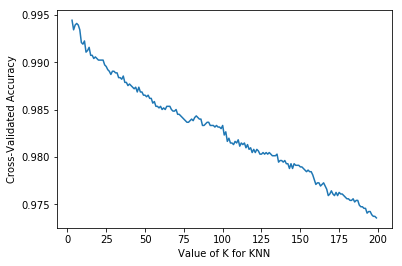

In [57]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [58]:
knn = KNeighborsClassifier(n_neighbors=190)
knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)

0.9712121212121212

In [59]:
data8['churn'] = knn.predict(data8.drop(['churn'],axis=1))

C:\Users\divi1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [60]:
data2 = pd.concat([data8,datanew])

In [61]:
data2['churn'].value_counts()

1    70904
0    29095
Name: churn, dtype: int64

In [62]:
data2.shape

(99999, 104)

# Data Visualisation

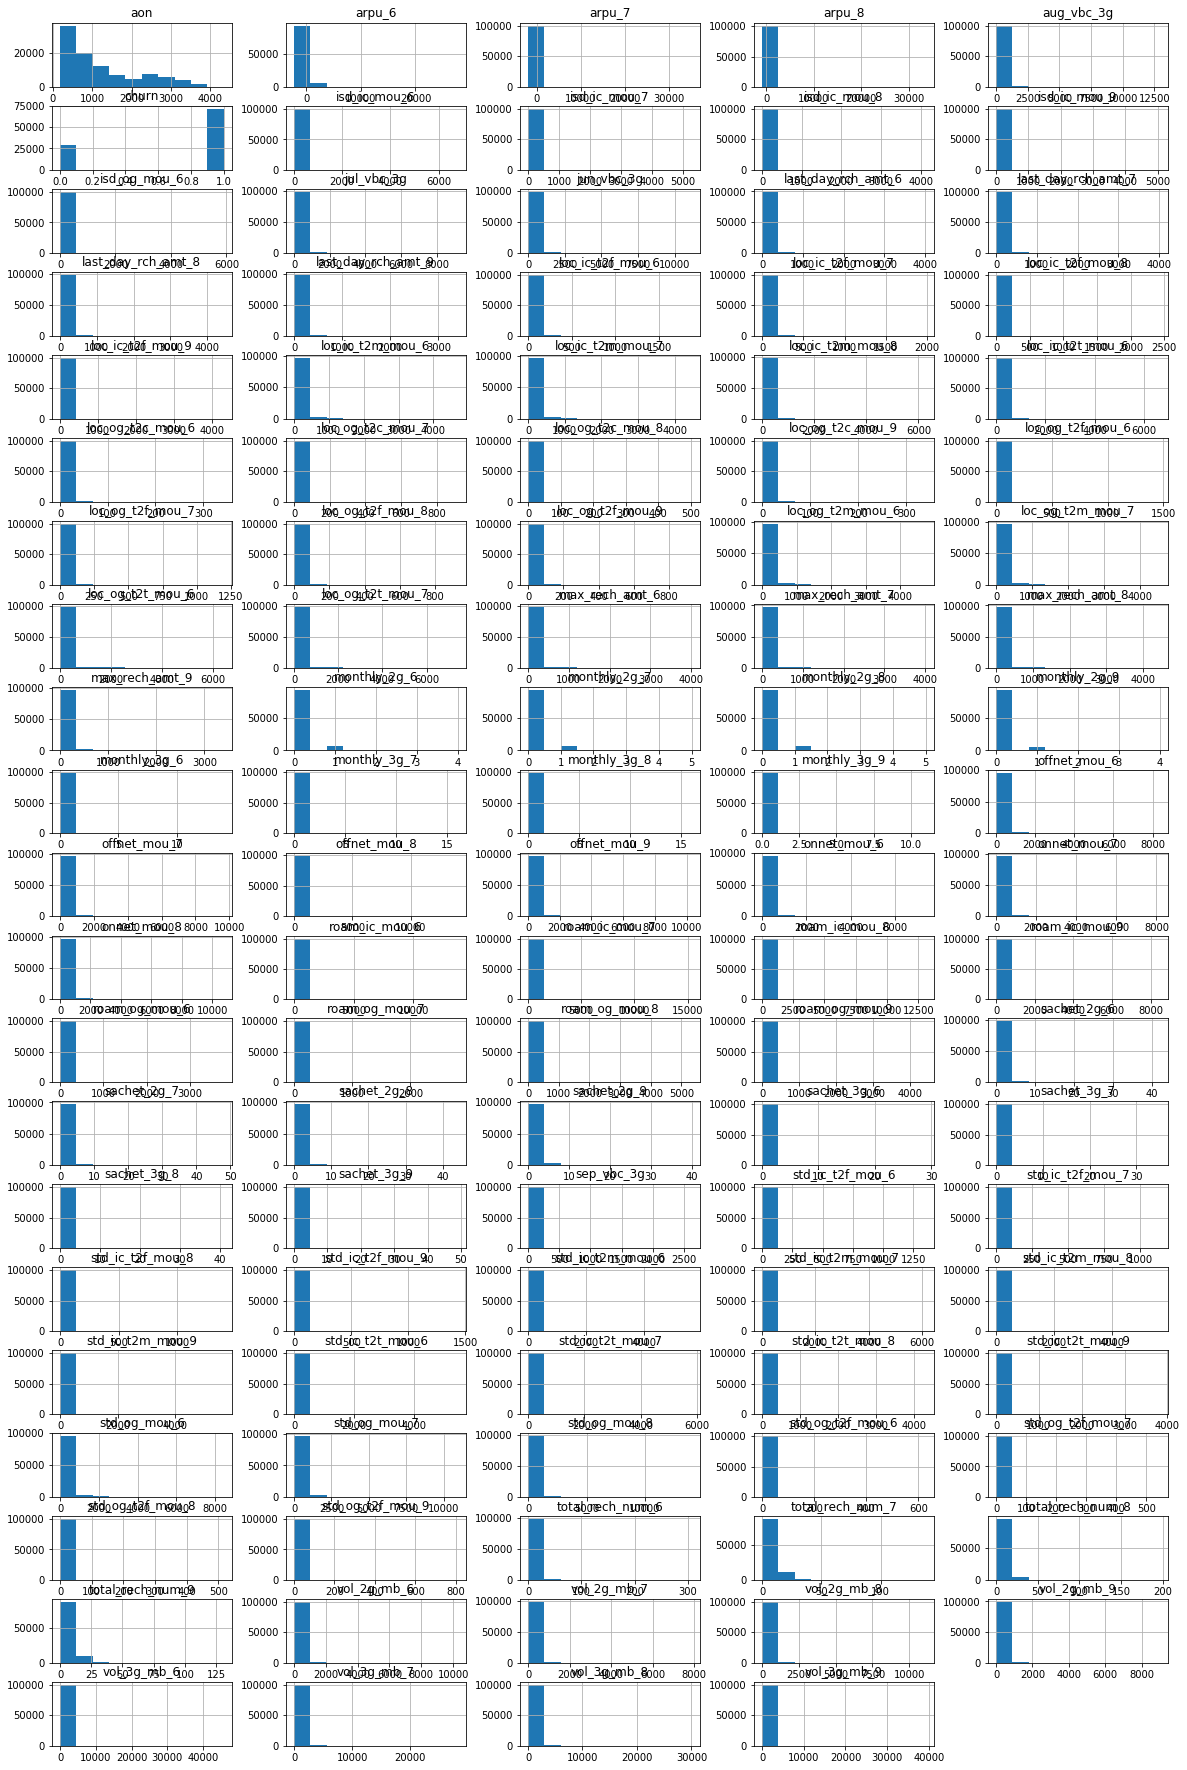

In [64]:
data2.hist(figsize=(20,50),layout=(33,5))
plt.show()

In [65]:
data2.total_rech_num_9.unique()

array([  6,   5,   7,  14,   4,   3,  15,   0,   8,   1,  10,  17,   2,
        13,  19,   9,  18,  11,  12,  22,  30,  21,  16,  24,  20,  25,
        29,  50,  31,  62,  63,  32,  23,  27,  35,  38,  51,  57,  37,
        40,  26,  83,  34,  44,  33,  48, 105,  28,  93,  52,  36,  69,
        39,  43,  46,  55,  42,  53,  45,  54,  47,  58,  94,  79,  60,
        61,  72,  49,  66,  90,  41,  56,  67,  65, 100,  59,  74,  64,
       131,  98,  75,  77,  73,  76,  71,  78,  97,  96, 125,  87,  85,
        80,  81,  68,  82,  99,  89], dtype=int64)

# Detecting and removing Outliers

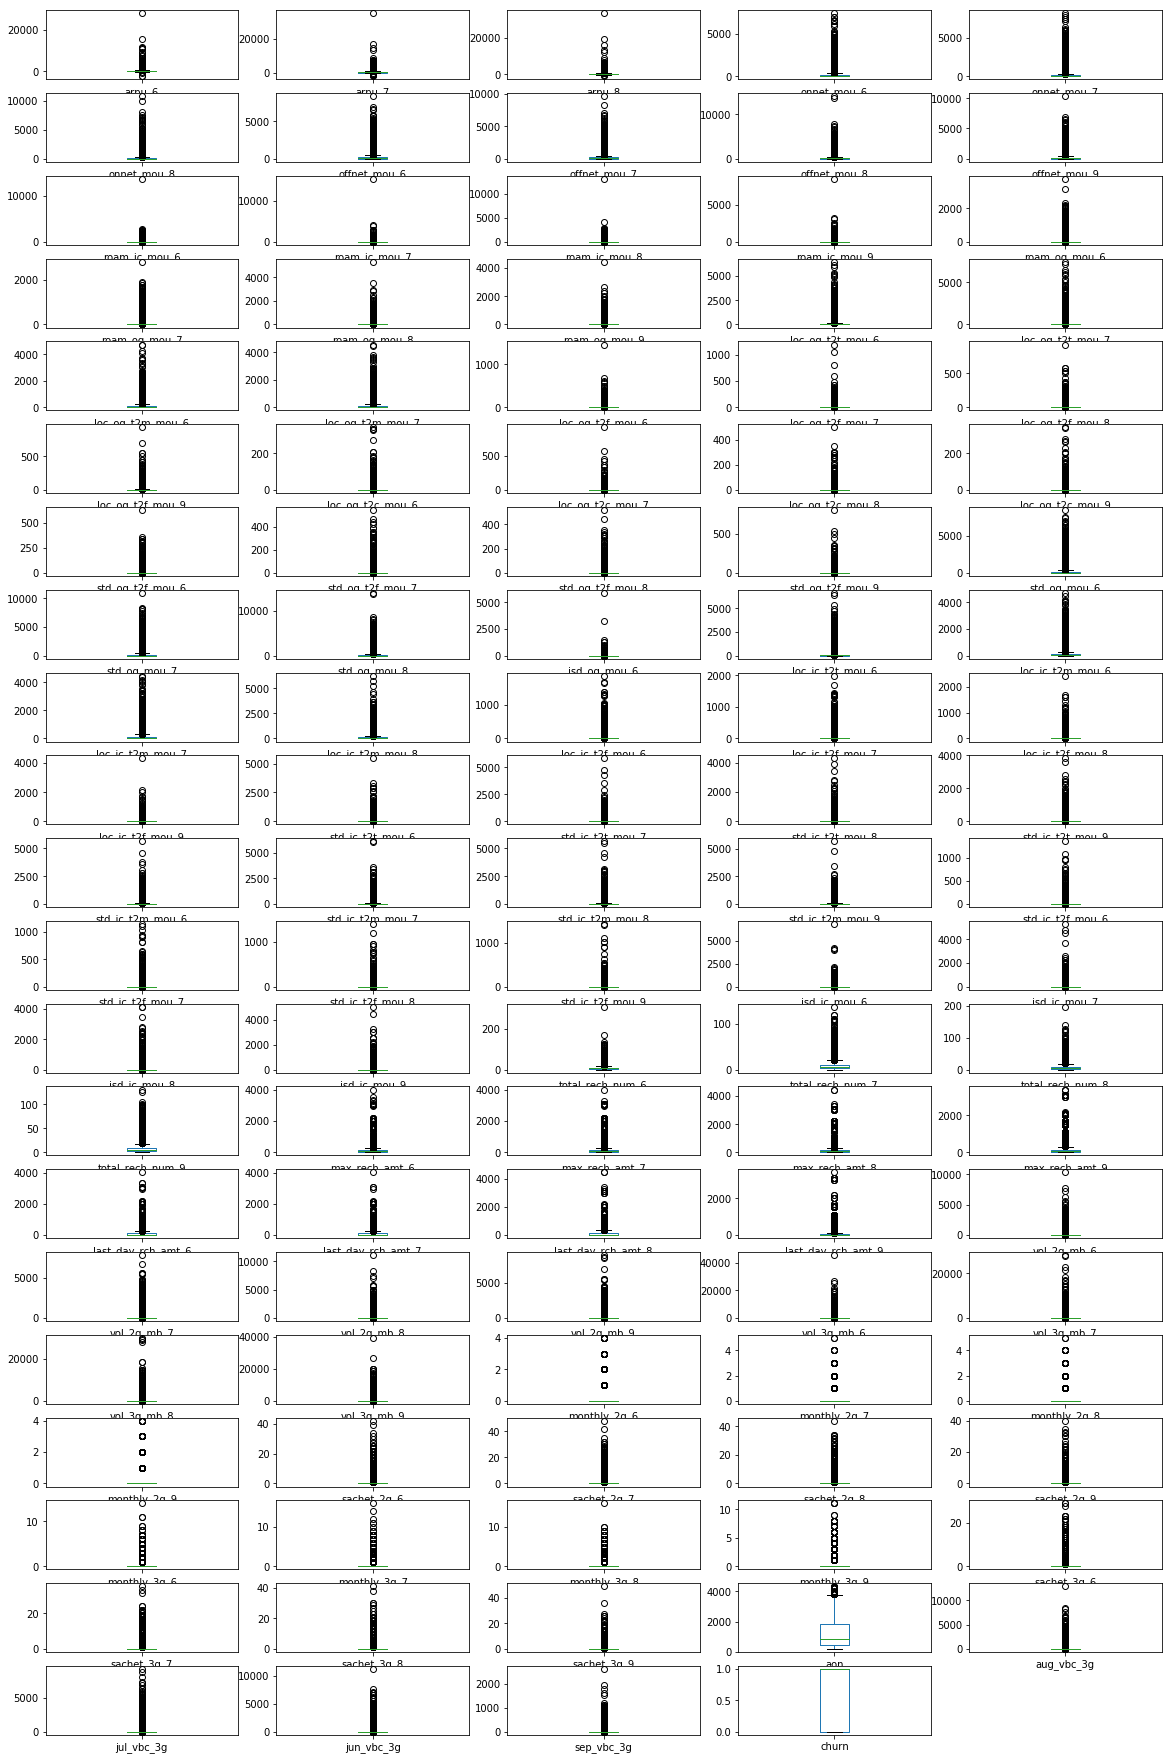

In [66]:
data2.plot(kind='box',subplots=True,figsize=(20,50),layout=(33,5))
plt.show()

In [67]:
q3 = data2.quantile(0.999)
q1 = data2.quantile(0.001)
iqr= q3-q1
high = q3+0*iqr
low = q1-0*iqr

In [68]:
indexes= data2.index[((data2>high)|(data2<low)).any(1)].to_list()
len(indexes)

5411

In [69]:
data2 = data2.drop(index=indexes)
data2 = data2.reset_index(drop=True)
data2.shape

(94588, 104)

In [70]:
y = data2['churn']
x = data2.drop('churn',axis=1)

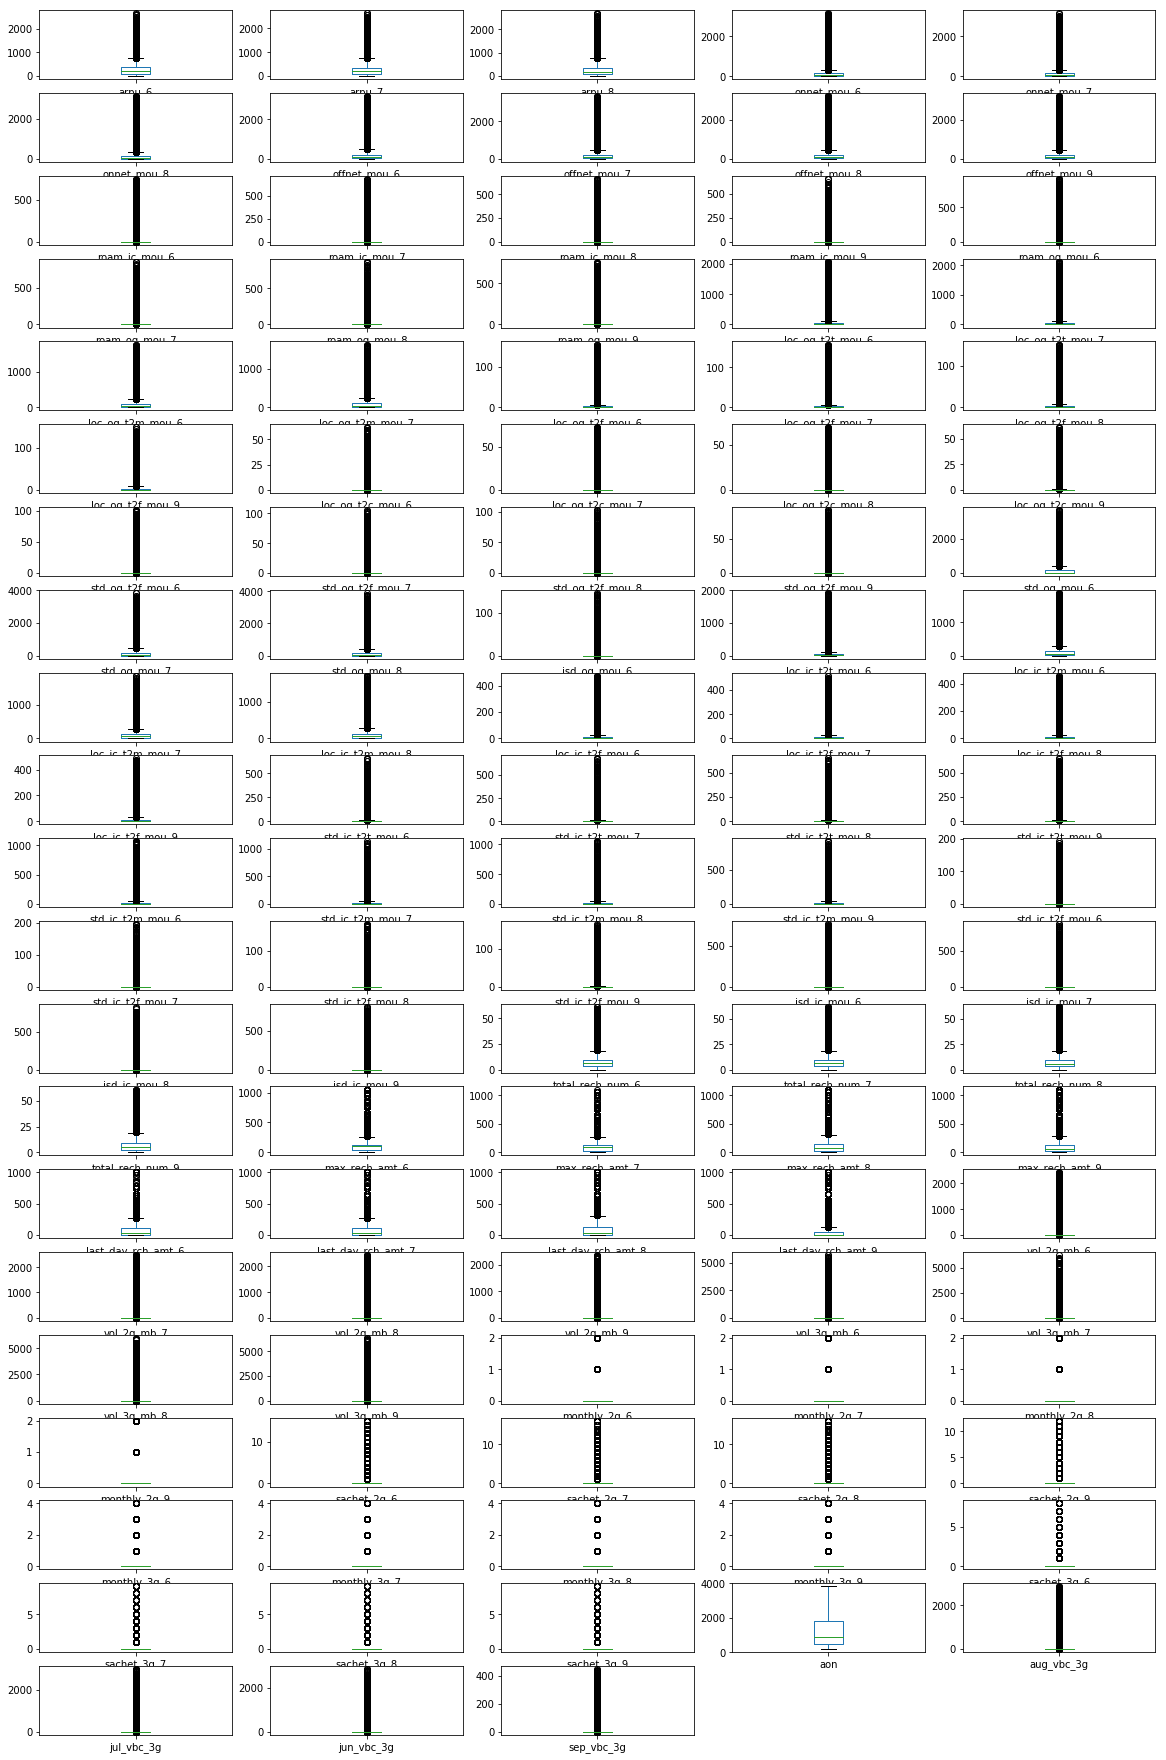

In [71]:
x.plot(kind='box',subplots=True,figsize=(20,50),layout=(33,5))
plt.show()

# Scaling and transformation

In [72]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
x = pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x.shape

C:\Users\divi1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(94588, 103)

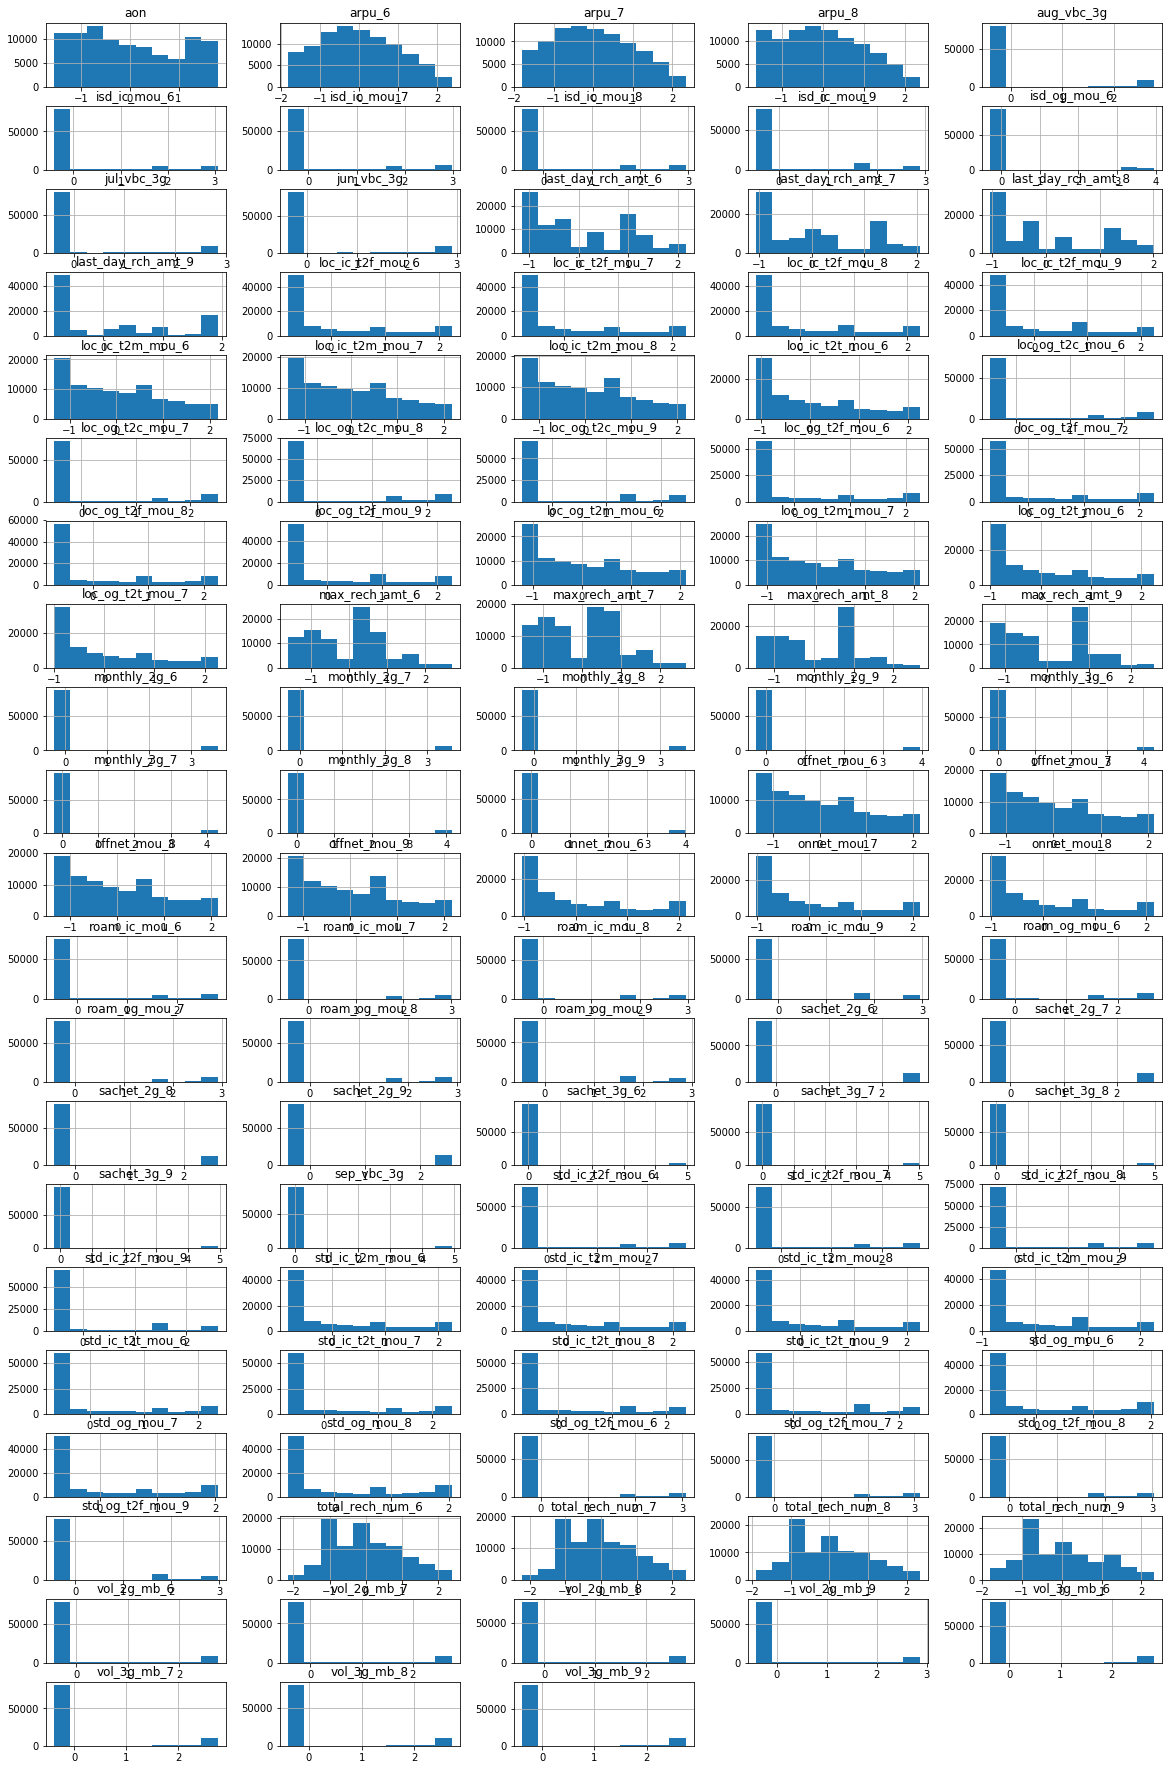

In [73]:
from sklearn.preprocessing import power_transform

x = pd.DataFrame(power_transform(x,method='yeo-johnson'),columns=x.columns)
x.hist(figsize=(20,50),layout=(33,5))
plt.show()

# Logistic Regression

In [74]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lg = LogisticRegression(multi_class='ovr',class_weight = 'balanced')
lg.fit(X_train,y_train)
pred = lg.predict(X_test)


accuracy_score(y_test,pred)
#class_weight='balanced'

C:\Users\divi1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8999894280579342

# Model Evaluation

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

matrix = confusion_matrix(y_test, pred)
print('Matrix:' ,matrix)

accuracy = accuracy_score(y_test, pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, pred)
print('Precision: %f' % precision)

recall = recall_score(y_test, pred)
print('Specificity/Recall: %f' % recall)

sensitivity = matrix[0,0]/(matrix[0,0]+matrix[0,1])
print('Sensitivity : ', sensitivity )

f1 = f1_score(y_test, pred)
print('F1 score: %f' % f1)

auc = roc_auc_score(y_test, pred)
print('ROC AUC: %f' % auc)

Matrix: [[ 6688   844]
 [ 1994 18851]]
Accuracy: 0.899989
Precision: 0.957146
Specificity/Recall: 0.904342
Sensitivity :  0.8879447689856612
F1 score: 0.929995
ROC AUC: 0.896143


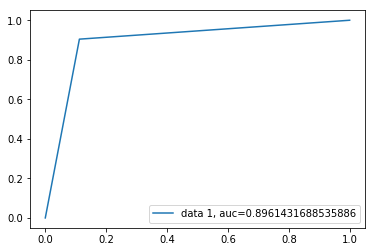

In [81]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test,  pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import power_transform


pipe = Pipeline([('scaler',MinMaxScaler()),('LOG',LogisticRegression(multi_class='ovr',class_weight = 'balanced'))])
pipe.fit(X_train,y_train)
pred = pipe.predict(X_test)
accuracy_score(y_test,pred)

C:\Users\divi1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8998484688303908